# Telco Customer Churn

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

sns.set_style('white')

## Columns
customer - IDCustomer ID

gender - Customer gender (female, male)

SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

Partner - Whether the customer has a partner or not (Yes, No)

Dependents - Whether the customer has dependents or not (Yes, No)

tenure - Number of months the customer has stayed with the company

PhoneService - Whether the customer has a phone service or not (Yes, No)

MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract - The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - The amount charged to the customer monthly

TotalCharges - The total amount charged to the customer

Churn - Whether the customer churned or not (Yes or No)

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/davidmertenjones/Thinkful_DSB_Unit_1/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df2 = df

In [44]:
# Change "No phone service" and "No internet service" to NaN, Yes/No to 1/0

df2['MultipleLines'] = df2['MultipleLines'].replace('No phone service', 'NaN')
df2['OnlineSecurity'] = df2['OnlineSecurity'].replace('No internet service', 'NaN')
df2['OnlineBackup'] = df2['OnlineBackup'].replace('No internet service', 'NaN')
df2['DeviceProtection'] = df2['DeviceProtection'].replace('No internet service', 'NaN')
df2['TechSupport'] = df2['TechSupport'].replace('No internet service', 'NaN')
df2['StreamingTV'] = df2['StreamingTV'].replace('No internet service', 'NaN')
df2['StreamingMovies'] = df2['StreamingMovies'].replace('No internet service', 'NaN')


yesno = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'MultipleLines',
         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
         'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in yesno:
    df2[column] = df2[column].replace({'Yes': 1, 'No': 0})

In [45]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,NaN,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,NaN,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [46]:
df2['Churn'].mean()

0.2653698707936959

The mean rate of churn for customers across all groups is 26.5%. If the rate of churn could be reduced, it would be better for long-term profits.

In [6]:
categoricals = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod']

#Mean churn for each categorical from dataframe columns:

for categorical in categoricals:
    print('Percentage of Customer Base:\n', df2[categorical].value_counts()/len(df2), '\n')
    print(df2.groupby(categorical)['Churn'].mean(), '\n')

Percentage of Customer Base:
 Male      0.504756
Female    0.495244
Name: gender, dtype: float64 

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64 

Percentage of Customer Base:
 0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64 

SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64 

Percentage of Customer Base:
 0    0.516967
1    0.483033
Name: Partner, dtype: float64 

Partner
0    0.329580
1    0.196649
Name: Churn, dtype: float64 

Percentage of Customer Base:
 0    0.700412
1    0.299588
Name: Dependents, dtype: float64 

Dependents
0    0.312791
1    0.154502
Name: Churn, dtype: float64 

Percentage of Customer Base:
 1    0.903166
0    0.096834
Name: PhoneService, dtype: float64 

PhoneService
0    0.249267
1    0.267096
Name: Churn, dtype: float64 

Percentage of Customer Base:
 0      0.481329
1      0.421837
NaN    0.096834
Name: MultipleLines, dtype: float64 

MultipleLines
0      0.250442
1      0.286099
NaN    0.249

In [7]:
for categorical in categoricals:
    for category in df2[categorical].unique():
        print(categorical, ':', category, '\n', stats.ttest_1samp(df2[df2[categorical] == category].Churn, df2.Churn.mean()))

gender : Female 
 Ttest_1sampResult(statistic=0.51107576906447505, pvalue=0.60933035861584528)
gender : Male 
 Ttest_1sampResult(statistic=-0.51089260281216797, pvalue=0.60945799438930315)
SeniorCitizen : 0 
 Ttest_1sampResult(statistic=-5.301186124510493, pvalue=1.1923445557695417e-07)
SeniorCitizen : 1 
 Ttest_1sampResult(statistic=10.375685276314945, pvalue=3.6520418651627592e-24)
Partner : 1 
 Ttest_1sampResult(statistic=-10.083080048864131, pvalue=1.402997973511985e-23)
Partner : 0 
 Ttest_1sampResult(statistic=8.241361279732466, pvalue=2.3497313805702807e-16)
Dependents : 0 
 Ttest_1sampResult(statistic=7.1831582785651937, pvalue=7.8291286475697813e-13)
Dependents : 1 
 Ttest_1sampResult(statistic=-14.087008578225078, pvalue=3.8673174503229455e-43)
PhoneService : 0 
 Ttest_1sampResult(statistic=-0.97141658730702818, pvalue=0.33168576863640864)
PhoneService : 1 
 Ttest_1sampResult(statistic=0.31119824130056717, pvalue=0.75566011915217912)
MultipleLines : NaN 
 Ttest_1sampResult(st

                  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
SeniorCitizen          1.000000  0.016479   -0.211185  0.016567      0.008576   
Partner                0.016479  1.000000    0.452676  0.379697      0.017706   
Dependents            -0.211185  0.452676    1.000000  0.159712     -0.001762   
tenure                 0.016567  0.379697    0.159712  1.000000      0.008448   
PhoneService           0.008576  0.017706   -0.001762  0.008448      1.000000   
PaperlessBilling       0.156530 -0.014877   -0.111377  0.006152      0.016505   
MonthlyCharges         0.220173  0.096848   -0.113890  0.247900      0.247398   
Churn                  0.150889 -0.150448   -0.164221 -0.352229      0.011942   

                  PaperlessBilling  MonthlyCharges     Churn  
SeniorCitizen             0.156530        0.220173  0.150889  
Partner                  -0.014877        0.096848 -0.150448  
Dependents               -0.111377       -0.113890 -0.164221  
tenure            

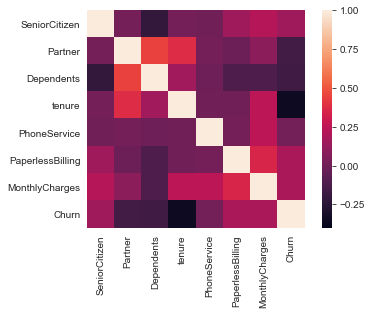

In [8]:
corrmat = df2.corr()
print(corrmat)

sns.heatmap(corrmat, vmin= -.4, vmax=1, square=True)
plt.show()

Th

## Contract Type

After comparing the results of a battery of t-tests on each category within the categorical variables, it is apparent that the group with the highest t-statistic is customers with a month-to-month contract. This group also makes up the largest proportion of the customer base of any of the groups in the data.

In [9]:
df2['Contract'].value_counts()/len(df2)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

In [10]:
df2.groupby('Contract')['Churn'].mean()

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

Month-to-month customers account for 55% the customer base, and their churn rate is 42.7%.

In [11]:
stats.ttest_1samp(df2[df2.Contract == 'Month-to-month'].Churn, df2.Churn.mean())

Ttest_1sampResult(statistic=20.349713530648003, pvalue=1.5145889637703644e-87)

### Customer Tenure and Contract Type

Tenure and churn are not the same variable, but long tenure implies that the customer *hasn't* churned. Let's look at the churn rate for different tenure lengths.

In [12]:
df2.groupby('Contract')['tenure'].mean()

Contract
Month-to-month    18.036645
One year          42.044807
Two year          56.735103
Name: tenure, dtype: float64

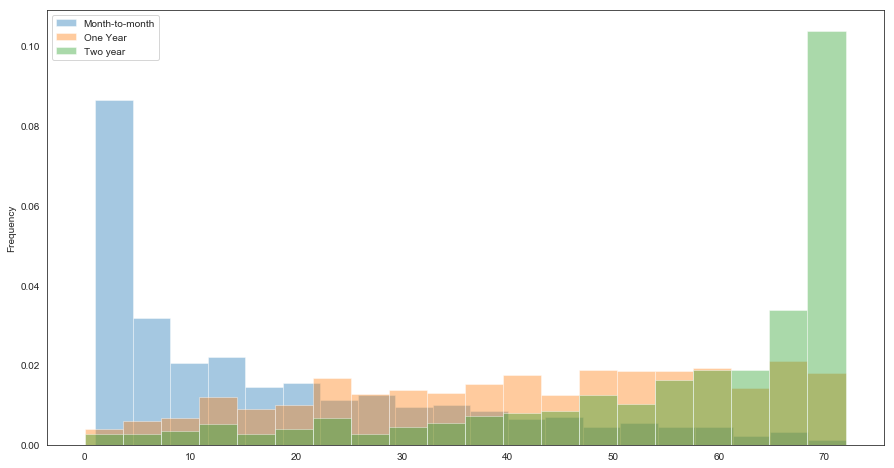

In [13]:
plt.rcParams['figure.figsize'] = 15, 8

df2[df['Contract'] == 'Month-to-month']['tenure'].plot.hist(alpha=0.4, bins=20, density=True)
df2[df['Contract'] == 'One year']['tenure'].plot.hist(alpha=0.4, bins=20, density=True)
df2[df['Contract'] == 'Two year']['tenure'].plot.hist(alpha=0.4, bins=20, density=True)

plt.legend(['Month-to-month', 'One Year', 'Two year'])

plt.show()

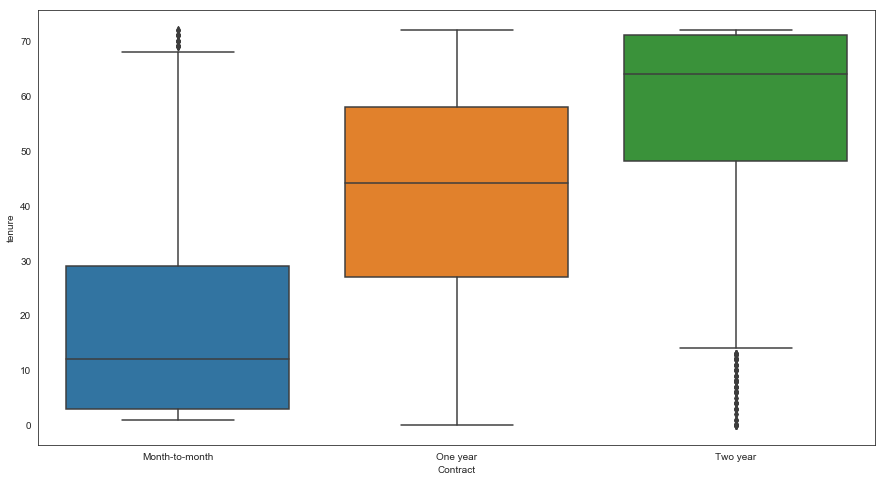

In [14]:
sns.boxplot(x='Contract', y='tenure', data=df2)

The histogram and boxplots above show that the average tenure for customers with month-to-month contracts is much lower than it is for customers with one- and two-year contracts.

### Tenure and Churn

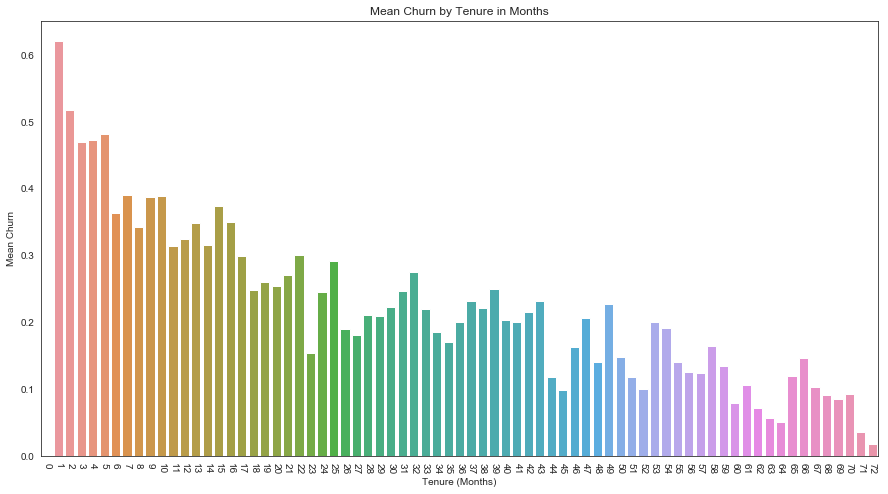

In [15]:
plt.rcParams['figure.figsize'] = 15, 8

sns.barplot(sorted(df2.tenure.unique()), df2.groupby('tenure')['Churn'].mean())
plt.title('Mean Churn by Tenure in Months')
plt.ylabel('Mean Churn')
plt.xlabel('Tenure (Months)')

plt.xticks(rotation=270)
plt.show()

In [16]:
stats.pearsonr(sorted(df2.tenure.unique()), df2.groupby('tenure')['Churn'].mean())

(-0.81779104168317107, 1.0550564327624254e-18)

There is a strong negative correlation between tenure and churn. Now let's revisit the mean churn rate for customers of different contract types:

### Monthly Charges by Contract Type

In [17]:
df2['MonthlyCharges'].mean()

64.76169246059922

In [18]:
df2.groupby('Contract')['MonthlyCharges'].mean()

Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

The average monthly charges for one-year contract customers are not much lower than monthly charges for month-to-month customers, so there may not be enough of an incentive for customers to apply for one-year contracts as opposed to month-to-month contracts.

### T-Tests for Churn by Contract Type

In [19]:
#Month-to-month to One year

stats.ttest_ind(df2[df2['Contract'] == 'Month-to-month']['Churn'], df2[df2['Contract'] == 'One year']['Churn'])

Ttest_indResult(statistic=22.690547349646753, pvalue=6.6946743141075091e-109)

In [20]:
#Month-to-month to Two year

stats.ttest_ind(df2[df2['Contract'] == 'Month-to-month']['Churn'], df2[df2['Contract'] == 'Two year']['Churn'])

Ttest_indResult(statistic=32.397179500022013, pvalue=4.2567531983847149e-211)

In [21]:
#One year to Two year

stats.ttest_ind(df2[df2['Contract'] == 'One year']['Churn'], df2[df2['Contract'] == 'Two year']['Churn'])

Ttest_indResult(statistic=9.5707261647739266, pvalue=2.0626005944237388e-21)

### T-tests for Monthly Charges by Contract Type

In [22]:
#Month-to-month to One year

stats.ttest_ind(df2[df2['Contract'] == 'Month-to-month']['MonthlyCharges'], df2[df2['Contract'] == 'One year']['MonthlyCharges'])

Ttest_indResult(statistic=1.5547454607730395, pvalue=0.12006589668516211)

In [23]:
#Month-to-month to Two year

stats.ttest_ind(df2[df2['Contract'] == 'Month-to-month']['MonthlyCharges'], df2[df2['Contract'] == 'Two year']['MonthlyCharges'])

Ttest_indResult(statistic=6.5510143844800659, pvalue=6.2284306871495439e-11)

In [24]:
#One year to Two year

stats.ttest_ind(df2[df2['Contract'] == 'One year']['MonthlyCharges'], df2[df2['Contract'] == 'Two year']['MonthlyCharges'])

Ttest_indResult(statistic=3.5970603868489781, pvalue=0.00032675490010008383)

There appears to be a wide gap between the respective churn rates of customers with different contract types.

# Customer Churn Research Proposal

Can churn be reduced by offering a discount on 1-year contracts to existing month-to-month customers?

## Problem and Analysis

At a current rate of 26.5%, our customer churn is too high, and we need to implement a more effective customer retention program. 

There are several variables in the customer data that appear to be related to churn, but contract type stands out as having the largest subset of customers with the highest rate of churn (55% of customers are on month-to-month contracts, and they have a 42.7% churn rate.)

Customer contract type appears to be related both to customer tenure and to churn, with duration of tenure being much higher and churn being lower for one-year and two-year contracts than for month-to-month contracts. Month-to-month customers make up the majority of our customer base, and they also have the highest churn rate out of the three groups, so focusing on that group first would likely be best. If we could incentivize month-to-month customers to switch to one-year or two-year contracts, we might be able to reduce churn. 

As it stands, the average bill paid by month-to-month customers is \$66.39/month, while the amount paid by one-year contract customers is \$65.05/month, and the amount paid by two-year contract customers is \$60.77/month. As it stands, month-to-month customers save \$16.08/year if they switch to one-year contracts, and \$67.44/year if they switch to two-year contracts. These rates of savings may not be enough to convince customers to switch to longer-term contracts.

## Hypothesis

Offering discounts on longer-term contracts to existing month-to-month and one-year contract customers will result in a greater rate of switching to longer-term contracts, which will in turn decrease overall churn.

## Method of Testing and Key Metrics

Current month-to-month customers will be randomly divided into two groups, which will be t-tested against one another to make sure the groups have roughly similar distributions. These two groups will be shown different versions of an email advertising one-year contracts. The control group will be shown the current email with unchanged rates, and the second group will be shown a new version of the email, advertising reduced monthly charges.

The exact dollar amounts of the rate changes will be determined when the budget has been assessed.

We will be observing the rate of churn itself, but since the expected outcome of the treatment is not the direct reduction of churn, but rather the change to a contract with a lower churn rate, we will evaluate success in two stages; first, on the rate at which customers with shorter-term contracts switch to longer-term contracts, and second, on whether these customers who have switched have a lower churn rate after their adjusted contracts have expired.

## Rollout Plan and Evaluation

### Initial testing:

Initially, treatment groups will start out much smaller than the control groups to minimize losses in case the incentives are ineffective. Emails are already sent out to customers advertising the longer-term plans. For this study, there will be two versions of that email, one with the same prices as before, one with reduced prices. The first wave of emails will be sent out, and conversion rate data will begin to be collected, as well as time between treatment and conversion, and churn rate for each group.

### One Month:

One month after the first batch of emails are sent, we will compare the rate at which customers in the month-to-month control group have signed up for longer-term plans compared with the rate for month-to-month customers in the treatment groups. The same comparison will be done for customers in the one-year control and treatment groups. If there is a statistically significant increase of 10% or more in customers who switch to longer-term contracts, the first part of the project will be considered a success, and the ad campaign will roll out for all customers. If there is not a statistically significant difference, observation will continue until the two month window.

### Two Months:

At this point, if there is not a significant change of 10% or more towards longer-term contracts in the treatment groups (in both parts of the study), the study will be terminated. If there is, the month-to-month treatment groups will be compared to one another to see if there is a difference in the rate of signups between conversions to one-year or two-year contracts. If there is a statistically significant difference of 10% or more, more resources will be put into advertising the more successful contract type, and the campaign will roll out to the entire customers base.

### One-Year Follow-up:

Assuming that the one-year contract won out over the two-year contract in the month-to-month treatment groups, this is the critical point at which churn will be measured, since the year-long contracts will be expiring. If customers who switched plans show an increased rate of churn, or if they return to month-to-month contracts, the changes in plan pricing will be reevaluated.

# Further Testing

Customer contract type is not the only variable where there is a large discrepency in churn between different categories; type of internet service also had a wide gap between customers with DSL (low churn) and customers with fiber optic internet (high churn). Additionally, customers who had selected automatic payment options (bank transfer and credit card payments) had a lower churn rate than those who paid with mailed-in checks or electronic checks. The differences in these variables warrant further research.

## Internet Service

### Rate of Churn by Type of Internet Service

In [25]:
df2.groupby('InternetService')['Churn'].mean()

InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64

In [26]:
df2['InternetService'].value_counts()/len(df2)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

Customers with fiber optic have a much higher rate of churn than customers with DSL. Intriguingly, customers with no internet service through this company have the lowest rate of churn.

In [27]:
df2.groupby('OnlineSecurity')['Churn'].mean()

OnlineSecurity
0      0.417667
1      0.146112
NaN    0.074050
Name: Churn, dtype: float64

### Monthly Charges by Type of Internet Service

In [28]:
df2.groupby('InternetService')['MonthlyCharges'].mean()

InternetService
DSL            58.102169
Fiber optic    91.500129
No             21.079194
Name: MonthlyCharges, dtype: float64

In [29]:
df2.groupby('OnlineSecurity')['MonthlyCharges'].mean()

OnlineSecurity
0      75.693067
1      78.838732
NaN    21.079194
Name: MonthlyCharges, dtype: float64

### Customer Tenure and Internet Service Type

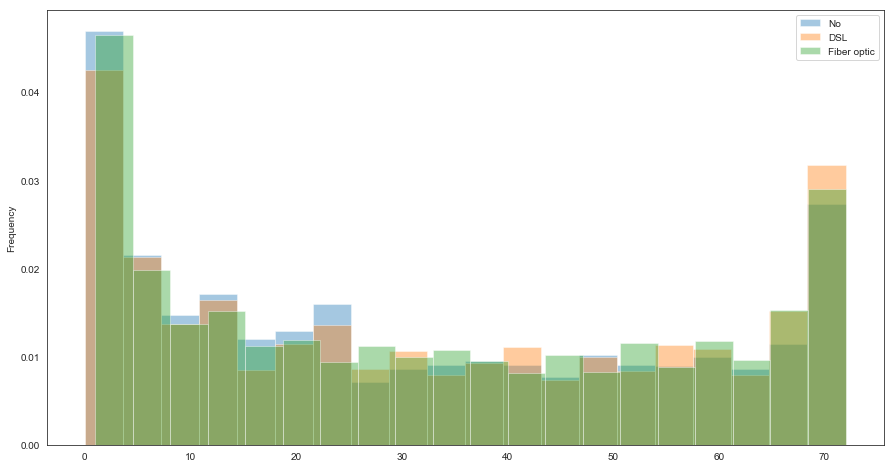

In [30]:
plt.rcParams['figure.figsize'] = 15, 8

df2[df['InternetService'] == 'No']['tenure'].plot.hist(alpha=0.4, bins=20, density=True)
df2[df['InternetService'] == 'DSL']['tenure'].plot.hist(alpha=0.4, bins=20, density=True)
df2[df['InternetService'] == 'Fiber optic']['tenure'].plot.hist(alpha=0.4, bins=20, density=True)

plt.legend(['No', 'DSL', 'Fiber optic'])

plt.show()

### Comparison of Mean Churn for Contract Type and Internet Service Type

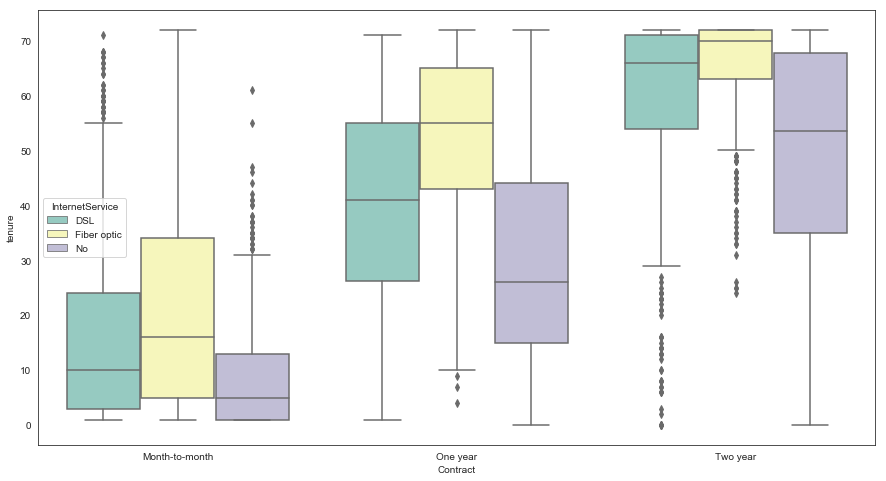

In [42]:
ax = sns.boxplot(x="Contract", y="tenure", hue="InternetService", data=df2, palette="Set3")
plt.show()

### T-Tests for Churn by Internet Service Type

In [33]:
#No Internet to DSL

stats.ttest_ind(df2[df2['InternetService'] == 'No']['Churn'], df2[df2['InternetService'] == 'DSL']['Churn'])

Ttest_indResult(statistic=-10.169981213495749, pvalue=5.3242892631546428e-24)

In [34]:
#No Internet to Fiber Optic

stats.ttest_ind(df2[df2['InternetService'] == 'No']['Churn'], df2[df2['InternetService'] == 'Fiber optic']['Churn'])

Ttest_indResult(statistic=-25.581955989532911, pvalue=4.1527946508190689e-135)

In [35]:
#DSL to Fiber optic

stats.ttest_ind(df2[df2['InternetService'] == 'DSL']['Churn'], df2[df2['InternetService'] == 'Fiber optic']['Churn'])

Ttest_indResult(statistic=-18.71090974627063, pvalue=8.6025368857087977e-76)

### T-tests for Monthly Charges by Internet Service Type

In [36]:
#No Internet to DSL

stats.ttest_ind(df2[df2['InternetService'] == 'No']['MonthlyCharges'], df2[df2['InternetService'] == 'DSL']['MonthlyCharges'])

Ttest_indResult(statistic=-88.452380011791547, pvalue=0.0)

In [37]:
#No Internet to Fiber Optic

stats.ttest_ind(df2[df2['InternetService'] == 'No']['MonthlyCharges'], df2[df2['InternetService'] == 'Fiber optic']['MonthlyCharges'])

Ttest_indResult(statistic=-215.68217834816946, pvalue=0.0)

In [38]:
#DSL to Fiber optic

stats.ttest_ind(df2[df2['InternetService'] == 'DSL']['MonthlyCharges'], df2[df2['InternetService'] == 'Fiber optic']['MonthlyCharges'])

Ttest_indResult(statistic=-85.770164471328229, pvalue=0.0)

## Mosaic Plots

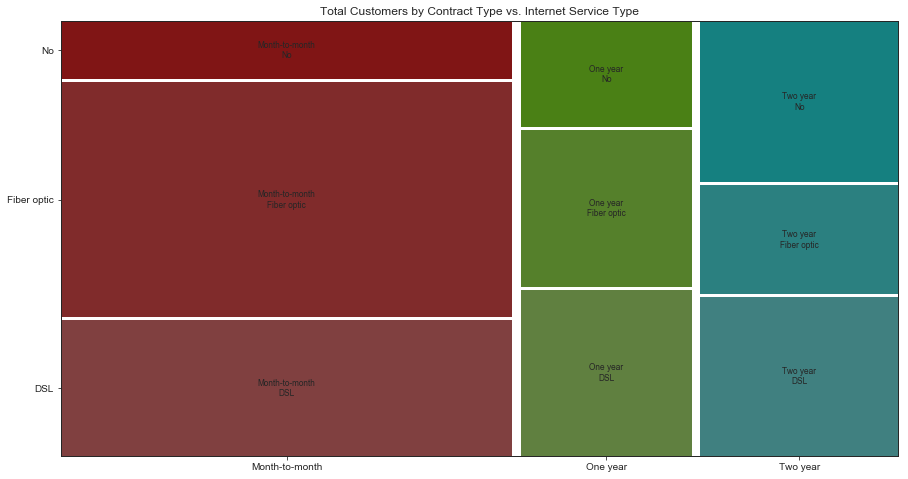

In [39]:
plt.rcParams['figure.figsize'] = 15, 8

mosaic(data=df2.loc[:, ['Contract', 'InternetService']], index=['Contract', 'InternetService'], title='Total Customers by Contract Type vs. Internet Service Type', gap=0.01)
plt.show()

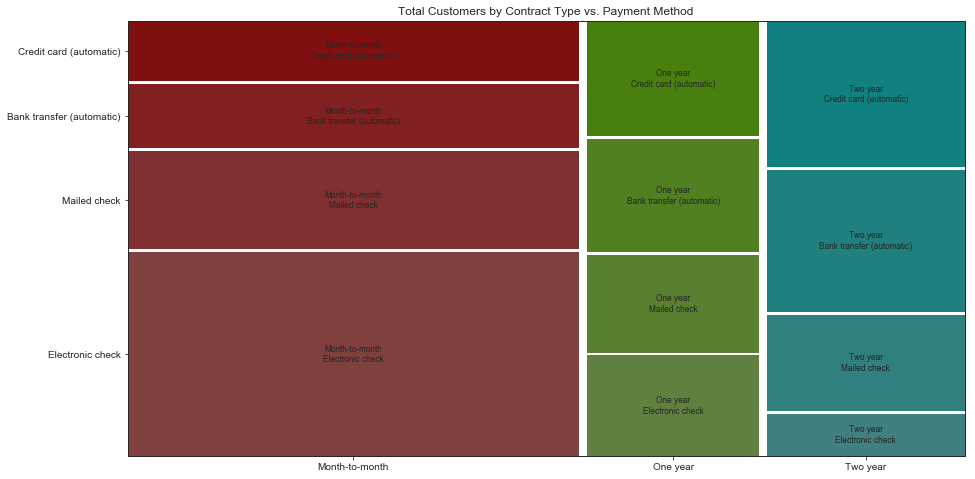

In [40]:
plt.rcParams['figure.figsize'] = 15, 8

mosaic(data=df2.loc[:, ['Contract', 'PaymentMethod']], index=['Contract', 'PaymentMethod'], title='Total Customers by Contract Type vs. Payment Method', gap=0.01)
plt.show()

# Sources:

Kaggle dataset (from IBM):
https://www.kaggle.com/blastchar/telco-customer-churn

Mosaic Plots:
https://medium.com/@LSchultebraucks/data-visualization-with-python-55ca70d108f2